<a href="https://colab.research.google.com/github/sarveshraghavan/credit-card-fraud-detection-/blob/main/Copy_of_nn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # ensures that matplotlib.pyplot is imported with the alias plt
import seaborn as sns
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from PIL import Image
tf.random.set_seed(2)

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
type(x_train)
x_train = x_train / 255
x_test = x_test / 255


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
x_train[22]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

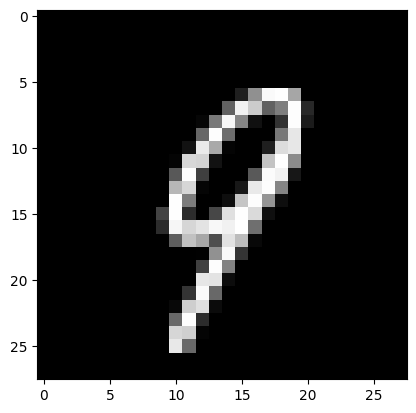

In [ ]:
plt.imshow(x_train[22], cmap='gray')

In [ ]:
print(y_train[22])

9


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6238 - loss: 1.2294 - val_accuracy: 0.8761 - val_loss: 0.4224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8836 - loss: 0.3953 - val_accuracy: 0.9041 - val_loss: 0.3322
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9067 - loss: 0.3200 - val_accuracy: 0.9152 - val_loss: 0.2912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9205 - loss: 0.2741 - val_accuracy: 0.9252 - val_loss: 0.2597
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9303 - loss: 0.2380 - val_accuracy: 0.9313 - val_loss: 0.2304
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9381 - loss: 0.2087 - val_accuracy: 0.9388 - val_loss: 0.2043
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9455 - loss: 0.1850 - val_accuracy: 0.9452 - val_loss: 0.1836
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9512 - loss: 0.166

In [ ]:
loss ,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1628


In [ ]:
print (accuracy)

0.9556999802589417


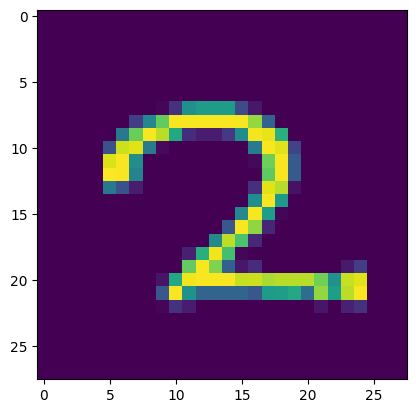

In [ ]:
plt.imshow(x_test[77])

In [ ]:
print(y_test[77])

2


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(y_pred)

[[4.8263217e-05 3.9941096e-08 1.1285982e-03 ... 9.9802589e-01
  1.5993712e-05 1.4321496e-04]
 [1.1259696e-04 3.2573896e-03 9.9023080e-01 ... 2.1597077e-09
  4.8094309e-05 7.9729344e-13]
 [3.6302031e-06 9.9150223e-01 1.2262142e-03 ... 9.4900228e-04
  3.5892162e-03 6.6374356e-05]
 ...
 [1.5681326e-08 2.4917657e-08 5.3391020e-08 ... 9.4940551e-06
  6.8889197e-04 5.7022548e-03]
 [1.1972558e-06 1.8157218e-05 5.2498024e-09 ... 1.7236601e-08
  3.1171998e-03 7.3908336e-06]
 [4.0132418e-05 2.4430530e-10 3.3635148e-05 ... 3.8690193e-11
  6.1033302e-07 3.7727185e-10]]


In [ ]:
lf = np.argmax(y_pred[77])
print(lf)

2


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
c_m = confusion_matrix(y_test, y_pred_labels)
print(c_m)

tf.Tensor(
[[ 971    0    1    2    0    1    3    1    1    0]
 [   0 1117    3    2    0    1    3    1    8    0]
 [  13    2  985    1    5    0    7    6   12    1]
 [   2    2   16  942    0    4    0   12   26    6]
 [   2    1    3    0  927    0   13    2    1   33]
 [  10    2    0   10    4  819   15    1   24    7]
 [  10    3    0    1    3    4  933    0    4    0]
 [   2    6   18    2    3    1    0  972    3   21]
 [   6    4    4    4    4    3    7    4  935    3]
 [   8    5    2    7   14    5    0    2   10  956]], shape=(10, 10), dtype=int32)


<Axes: >

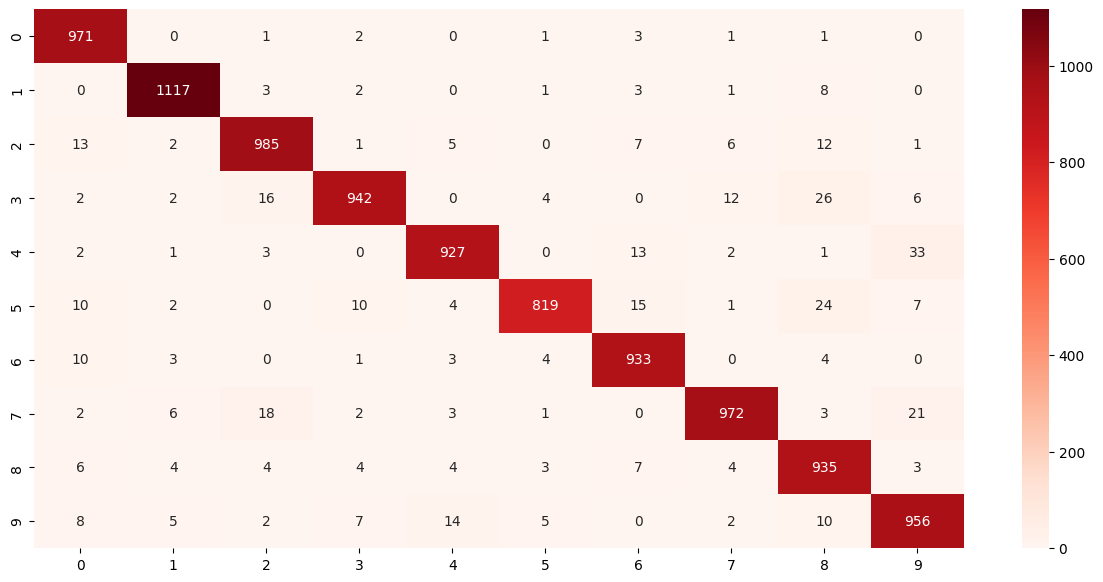

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(c_m,annot =True,fmt='d',cmap ='Reds')